In [1]:
%matplotlib inline

#dependencies and setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#file to Load
city_data_to_load = os.path.join('data','city_data.csv')
ride_data_to_load = os.path.join('data','ride_data.csv')

#read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df = city_data_df.drop_duplicates()

rid_data_df = pd.read_csv(ride_data_to_load)

#combine the data into a single dataset
combined_pyber_data_df = pd.merge(rid_data_df, city_data_df, how='outer', on='city')

#display data frame for preview
display_df = combined_pyber_data_df.drop_duplicates(subset="city", keep='first', inplace=False)
display_df = display_df.reset_index(drop=True)
display_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#group pyber data
city_group = combined_pyber_data_df.groupby("city")
average_fare = city_group["fare"].mean()
total_num_rides = city_group["ride_id"].count()
driver_count_by_city = city_group["driver_count"].mean()

#avoid duplicate index 
city_type = city_data_df.set_index('city')['type']

#new data frame for charting
pyber_city_split = pd.DataFrame({"Average Fare ($)":average_fare,
                 "Total Number of Rides (Per City)": total_num_rides,
                 "Driver Count Per City": driver_count_by_city,
                        "City Type": city_type,})


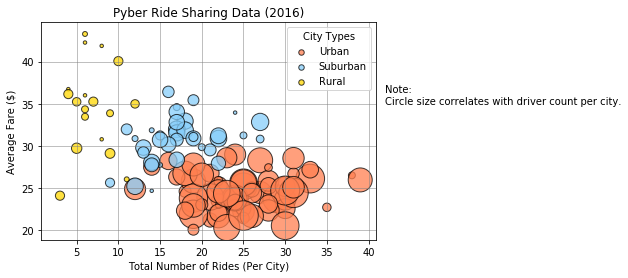

In [3]:
#urban
urban = pyber_city_split.loc[pyber_city_split["City Type"]== "Urban"]
plt.scatter(urban["Total Number of Rides (Per City)"], urban["Average Fare ($)"], color = "coral", edgecolors="black", s = urban["Driver Count Per City"]*12, label = "Urban", alpha = 0.75, linewidth = 1)

#suburban
suburban = pyber_city_split.loc[pyber_city_split["City Type"]== "Suburban"]
plt.scatter(suburban["Total Number of Rides (Per City)"], suburban["Average Fare ($)"], color = "lightskyblue", edgecolors ="black", s = suburban["Driver Count Per City"]*12, label = "Suburban", alpha = 0.75, linewidth = 1)

#rural
rural = pyber_city_split.loc[pyber_city_split["City Type"]== "Rural"]
plt.scatter(rural["Total Number of Rides (Per City)"], rural["Average Fare ($)"], color = 'gold', edgecolors = "black", s = rural["Driver Count Per City"]*12, label = "Rural", alpha = 0.75, linewidth = 1)

#scatter plot parameters
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.") 
plt.grid(linestyle='-', linewidth='0.5', color='gray')

#customize legend
legend = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
legend = plt.legend(title='City Types', loc= "upper right")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
plt.savefig('pyber_ride_sharing_data_2016.png')
plt.show()

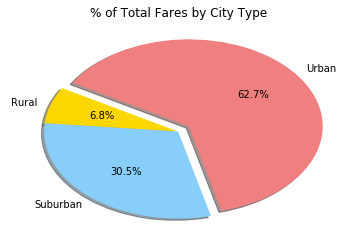

In [4]:
#group for charting total fares and rides
type_split = combined_pyber_data_df.groupby('type')['type', 'fare', 'ride_id']

#total fare
fare_sum = type_split.sum()['fare']

#pie chart color keys and explode
colors= ['#FFD700','#87CEFA','#F08080']
explode = [0 , 0, .1]

#pie chart parameters
labels = fare_sum.index
plt.pie(fare_sum, startangle = 150, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",shadow = True)
plt.title('% of Total Fares by City Type')

#display and save chart
plt.savefig('total_fares_by_city_type.png')
plt.show()

## Total Fares by City Type

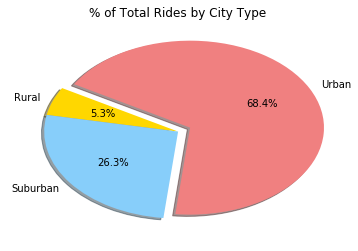

In [5]:
#total rides by city type
total_rides = type_split.count()['ride_id']

labels = total_rides.index
plt.pie(total_rides, startangle = 150, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title('% of Total Rides by City Type')

#display and save chart
plt.savefig('total_rides_by_city_type.png')
plt.show()

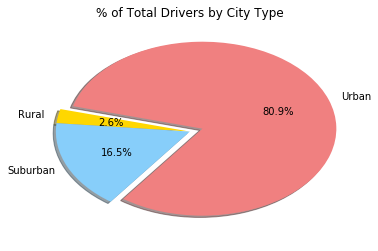

In [6]:
#total drivers by city type
type_split = city_data_df.groupby('type')

#driver_split = city_data_df.groupby('type')['driver_count']
total_drivers = type_split.sum()['driver_count']

labels = total_drivers.index
plt.pie(total_drivers, startangle = 165, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title('% of Total Drivers by City Type')

#display and save chart
plt.savefig('total_drivers_by_city_type.png')
plt.show()